# Introduction
In this notebook I will be implementing what I learned on this dataset. I chose to work on this dataset as a practice for me to gain more hands-on experience so your feedback is much appreciated.
## My main goal in this notebook:
* Do some Exploratory data analysis to gain more insights about the data and better understanding of the dataset.<br>
* Determine which features will be useful for us in the prediction and which features can be dropped.<br>
* Start working on the dataset doing some feature engineering and data preprocessing.<br>
* Finally the output will be the data ready to be used for the model training.

## 1- Importing the libraries and the data that we will use
The first step will be to import the libraries that will be needed in this notebook. The most important one of course is Pandas that will be used to create a DataFrame from the data that we will be working on. Also, matplotlib that will help us visualize the dataset.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing the data using pandas

In [43]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

Having a look on the data and the shape of the dataframe to know how many examples and features we have.

In [44]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
train.shape

(1460, 81)

In [47]:
test.shape

(1459, 80)

So the shape pf the data is 1460 examples and 81 features including our target variable "SalePrice".<br> 
We will start seeing the some basic info about the different columns in our dataset using the describe method.

In [48]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [49]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


The info shown in the describe method above will be helpful for us giving us some numbers like mean, min, max, count and the quantiles.<br>
By examining the "count" row we find that some of the features have missing values so this problem must be solved before the model training phase by seeing which columns have missing values and how to overcome this issue.<br>
But before that, the id column will not have any impact on the prediction so we can safely drop it.

In [50]:
#Dropping the "Id" column
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

Now that the initial analysis gave us an overview of the dataset, it's time to dig dipper into each type of features by examining correlations and using some visualization methods to check if any sort of feature engineering or transofrmations needed and to determine which features will have the most predictive powers and which features can be dropeed.

## *1- Numerical Columns:*
    - Correlation between different variables
    - Dealing with missing data
    - Checking feature distributions
    - Feature engineering by creating new features
    - Feature Normalization if needed

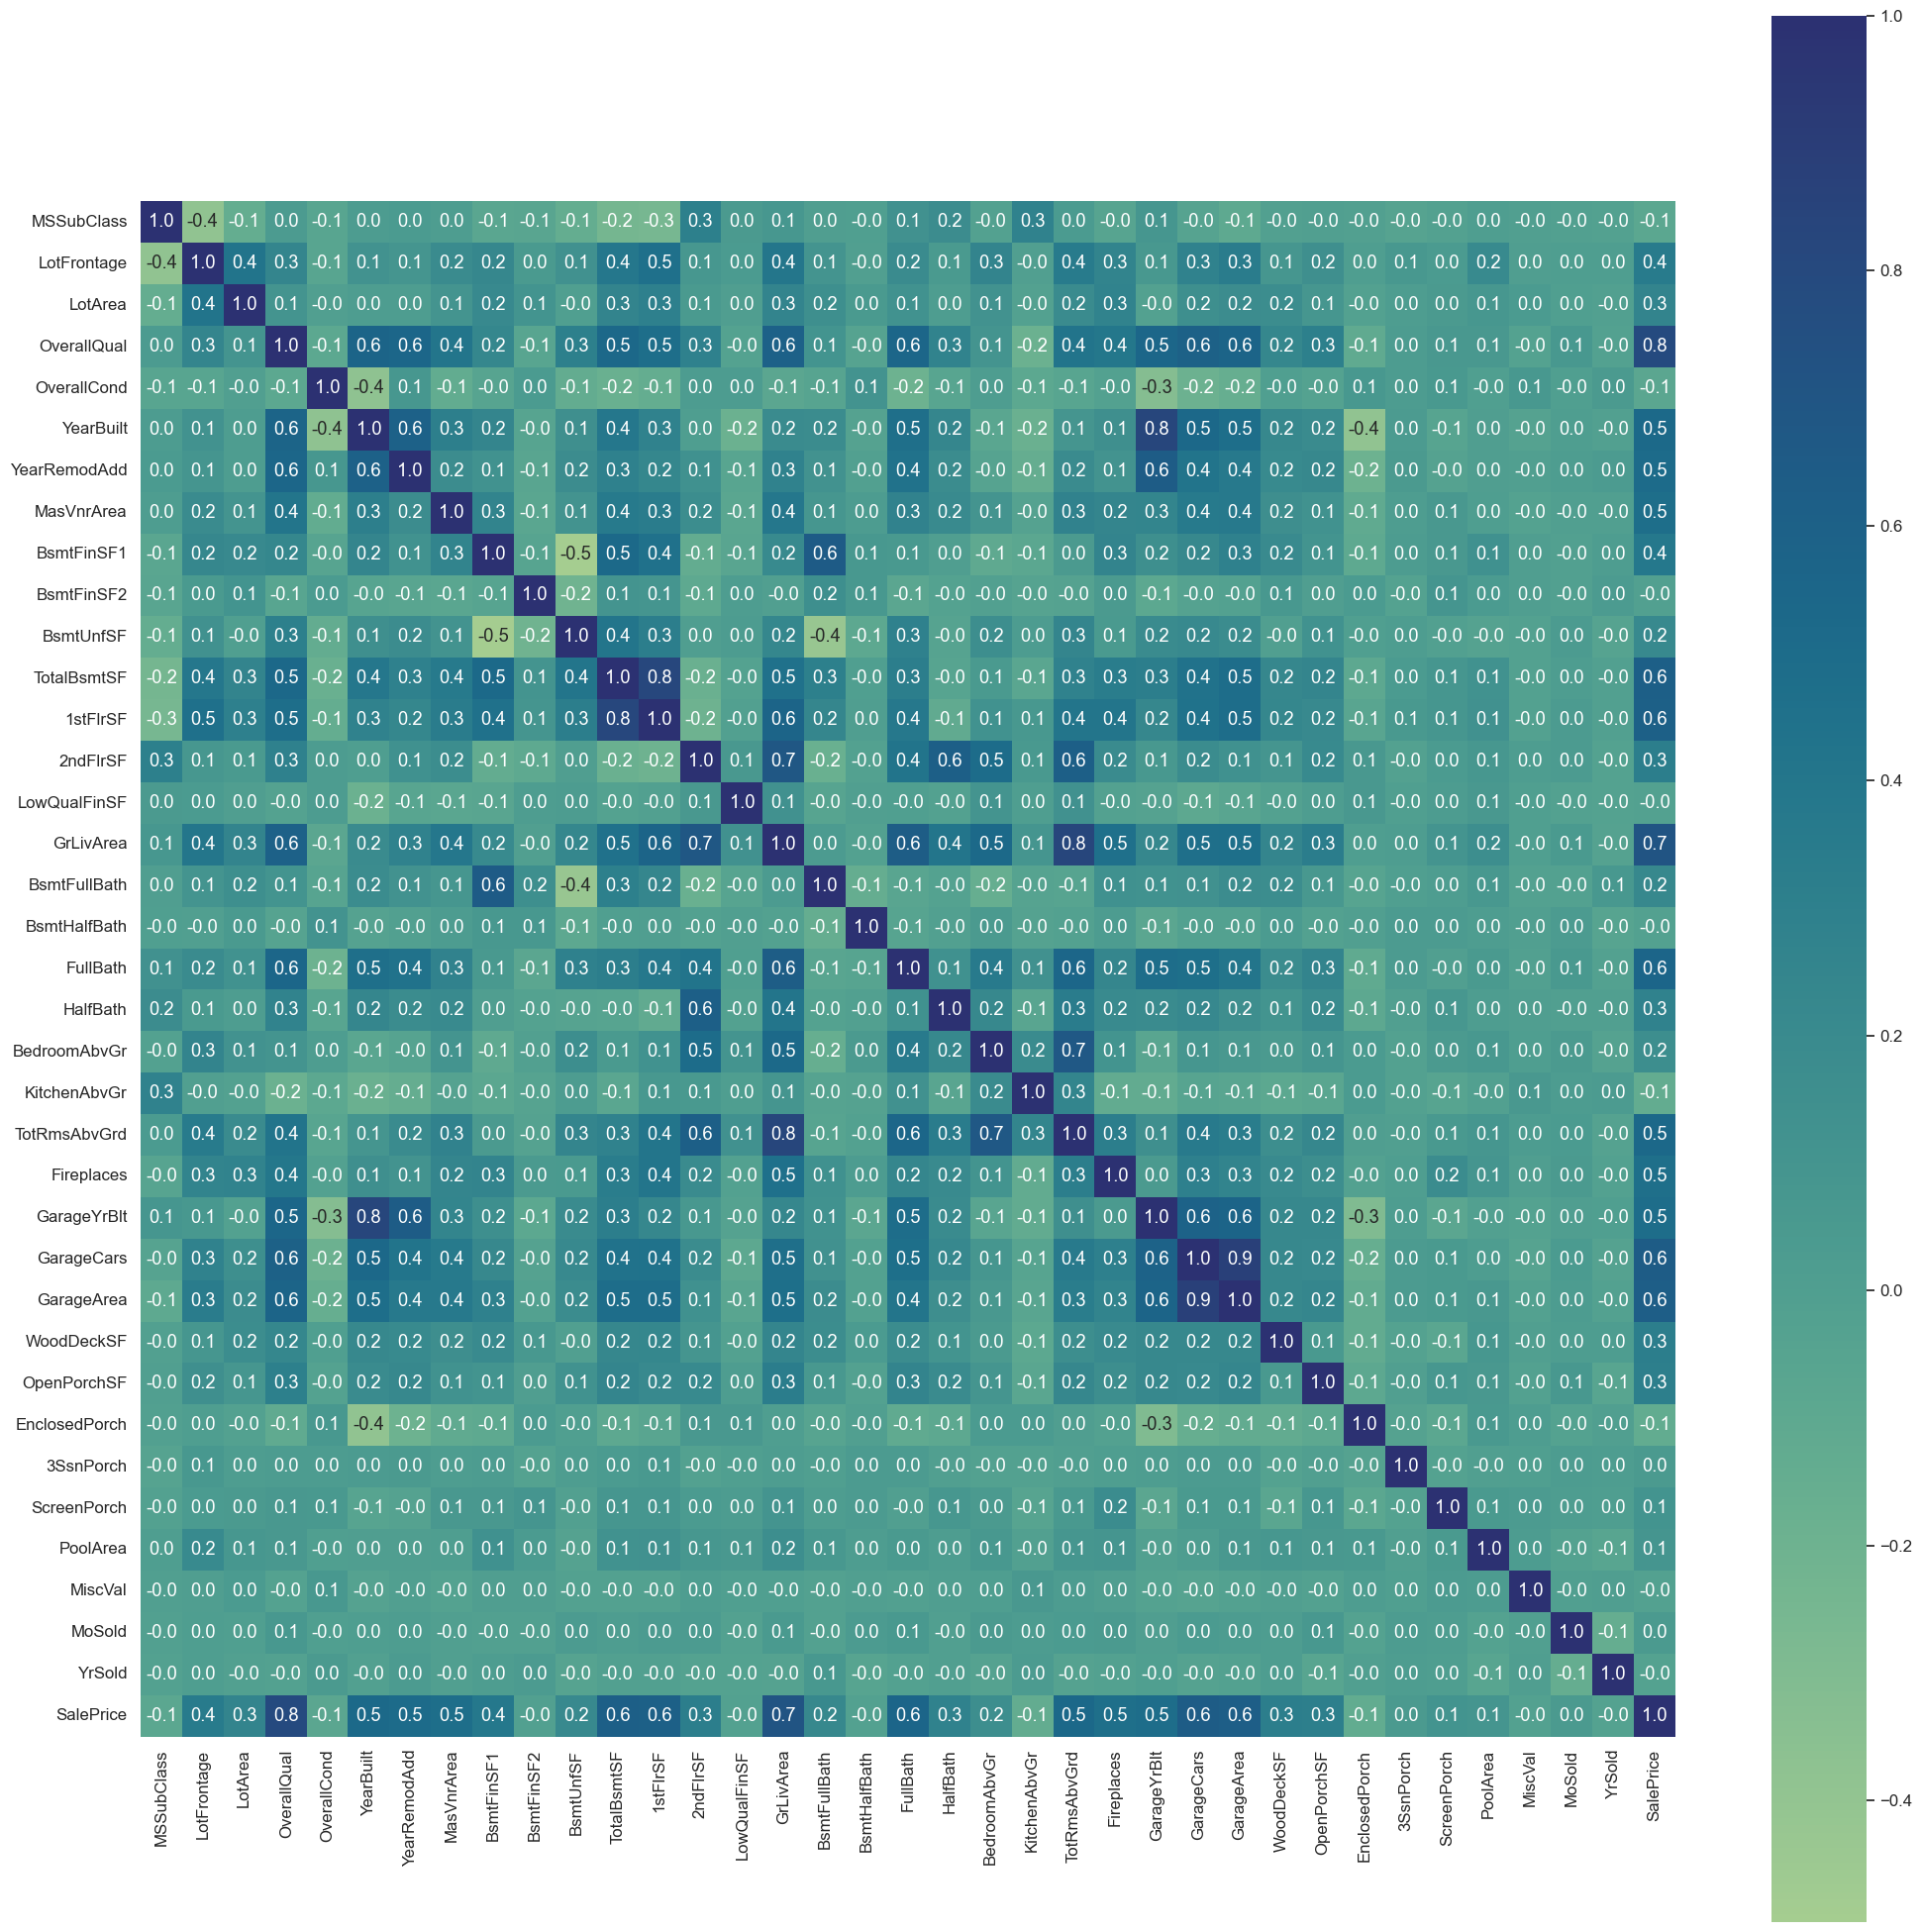

In [51]:
corr = train.corr()
sns.set(font_scale=1.1)
plt.figure(figsize = [25, 25])
sns.heatmap(corr, annot = True, square = True, fmt = ".1f", cmap="crest")
plt.show()

## Observations:
1- Some features have high correlation with each other like "TotRmsAbvGrd" and "GrLivArea" or "GarageYrBlt" and "YearBuilt" or "GarageArea" and "GarageCars". Having this sort of high correlation may be harmful to our model so these features will have to be investigated further but some of these are obvious relations.<br>
2- The overall condition of the house is not affecting its price.<br>
3- On the other hand, the overall quality of the house is a great indicator of its price.<br>
4- Some features have almost no impact on the sale price like the low quality finished square feet, pool area, month and year sold and some other features also.

## Next step os dealing with missing data:
The problem of having missing data can have multiple solutions depending on the meaning of the feature that is missing some values.
1. Some features with missing values will mean N/A or not existing.
2. In some other features it will mean 0.
3. Actually missing data.

Lets see first which columns have missing data in them.

In [52]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

**We can see that there is only 3 columns with missing values.<br>**
1. LotFrontage which is most probably a missing value that will be replaced.
2. MasVnrArea which is no Masonry veneer area so it will be replaced with 0.
3. GarageYrBlt which means that there was no garage which is None or N/A and will be replaced with 0.


In [53]:
#Replacing missing values in Lot Frontage by the mean
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)

#Replacing the missing values in columns where they mean 0
zeros = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
         'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
for col in zeros:
    train[col].fillna(0, inplace = True)

Now we check again if we have missing values.

In [54]:
train.isna().sum().sum()

6617

There is still some missing values but these are from the categorical columns. After dealing with the categorical missing values, we will check again.

In [55]:
train.shape

(1460, 80)

Our numerical features now have no missing values in them.<br>

## Now the other thing we need to check is the distribution of our data.
We will check the distribution of the features to see if some features have outliers.<br>
The best way to do that is by checking each feature in a reg plot which is a scatter plot and a regression line drawn to see the trends in each feature.

### Observations:

- As seen before, the overall condition of the house is not affecting the price but the overall quality does have an effect on the price.
- We can see that newer houses have a higher pricen which is logical but also very old houses have a bit higher price.
- Outliers can be spotted in some of the features and mainly the ones related to the basement.
- As mentioned before, the MoSold and YrSold almost have no effect on the price of the house so we can safely drop them.

## Dropping the outliers detected above
In this step we will drop the outliers identified by the eye.

In [56]:
train.shape

(1460, 80)

In [57]:
# dropping outliers manually
train = train.drop(train[(train['LotFrontage'] < 200) & (train['SalePrice'] > 600000)].index)

train = train.drop(train[(train['TotalBsmtSF'] > 3500) & (train['SalePrice'] > 500000)].index)

train = train.drop(train[(train['1stFlrSF'] > 33500) & (train['SalePrice'] > 500000)].index)

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] > 600000)].index)

In [58]:
train.shape

(1456, 80)

## Next is some feature engineering
We will create some new feature from the already existing ones

In [59]:
train['TotalSF'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] +
                    train['1stFlrSF'] + train['2ndFlrSF'])
train['TotalBathrooms'] = (train['FullBath'] +
                           (0.5 * train['HalfBath']) +
                           train['BsmtFullBath'] +
                           (0.5 * train['BsmtHalfBath']))

train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                         train['EnclosedPorch'] +
                         train['ScreenPorch'] + train['WoodDeckSF'])

In [60]:
train.shape

(1456, 83)

## 2- Categorical Columns
- Dealing with missing values
- Tranforming rare values in columns to 'other'
- Convert some columns to numerical (related to quality)
- Perform one hot encoding on the categorical columns

### Missing Values
In Categorical features, missing values can euther mean 'None' or can be actual mising values we can replace by mode.

In [61]:
#columns that mean 'None'
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
             'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

#columns with actual missing values
missing_cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
             'SaleType', 'Utilities']

for col in none_cols:
    train[col].replace(np.nan, 'None', inplace=True)

for col in missing_cols:
    train[col].replace(np.nan, train[col].mode()[0], inplace=True)

In [62]:
train.isna().sum().sum()

0

### Transforming rare values to 'other'
Some features have so many categorical values and some of them are rare so it is better to group these values into one 'other'

In [63]:
# Transforming rare values(less than 10) into one group.

for feature in train:
    mask = train[col].isin(train[col].value_counts()[train[col].value_counts() < 10].index)
    train[col][mask] = 'Other'

C:\Users\user\AppData\Local\Temp\ipykernel_4576\436697635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col][mask] = 'Other'
C:\Users\user\AppData\Local\Temp\ipykernel_4576\436697635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col][mask] = 'Other'
C:\Users\user\AppData\Local\Temp\ipykernel_4576\436697635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col][mask] = 'Other'
C:\Users\user\AppData\Local\

## Converting to numerical
In this step we will transform some categorical features to numerical features.
Note: The values for the mapping were taken from another great notebook I was checking called "Top 1% Approach: EDA, New Models and Stacking"

In [64]:
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

train['Neighborhood'] = train['Neighborhood'].map(neigh_map).astype('int')
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['ExterQual'] = train['ExterQual'].map(ext_map).astype('int')
train['ExterCond'] = train['ExterCond'].map(ext_map).astype('int')
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['BsmtQual'] = train['BsmtQual'].map(bsm_map).astype('int')
train['BsmtCond'] = train['BsmtCond'].map(bsm_map).astype('int')
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

train['BsmtFinType1'] = train['BsmtFinType1'].map(bsmf_map).astype('int')
train['BsmtFinType2'] = train['BsmtFinType2'].map(bsmf_map).astype('int')
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['HeatingQC'] = train['HeatingQC'].map(heat_map).astype('int')
train['KitchenQual'] = train['KitchenQual'].map(heat_map).astype('int')
train['FireplaceQu'] = train['FireplaceQu'].map(bsm_map).astype('int')
train['GarageCond'] = train['GarageCond'].map(bsm_map).astype('int')
train['GarageQual'] = train['GarageQual'].map(bsm_map).astype('int')

### One Hot Encoding
This will be the last step with the categorical features, to perform one hot encoding. but before that we will drop columns that are unecessary or will not add to the predictive power of our model and the we will redo all the above steps for the test set then apply the one hot encoding to both of the sets together.

In [65]:
train.shape

(1456, 83)

In [66]:
# deleting irrelevant and highly correlated features
train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","LowQualFinSF","BsmtFinSF2","BsmtHalfBath","3SsnPorch","MiscVal",
            "MoSold","YrSold","Utilities","PoolQC","ExterQual","BsmtQual","GarageQual","KitchenQual",
            "HeatingQC"],axis=1, inplace=True)

# converting categorical features repsented with numbers
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [67]:
# Removing the target variable from the training dataset
y_train = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace = True)

In [68]:
train.shape

(1456, 65)

## Test set
Next we will redo the above steps as they are but for the test set.

In [69]:
#Replacing missing values in Lot Frontage by the mean
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)

#Replacing the missing values in columns where they mean 0
zeros = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
         'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
for col in zeros:
    test[col].fillna(0, inplace = True)

# Creating the new features
test['TotalSF'] = (test['BsmtFinSF1'] + test['BsmtFinSF2'] +
                    test['1stFlrSF'] + test['2ndFlrSF'])
test['TotalBathrooms'] = (test['FullBath'] +
                         (0.5 * test['HalfBath']) +
                         test['BsmtFullBath'] +
                         (0.5 * test['BsmtHalfBath']))

test['TotalPorchSF'] = (test['OpenPorchSF'] + test['3SsnPorch'] +
                        test['EnclosedPorch'] +
                        test['ScreenPorch'] + test['WoodDeckSF'])

# Categorical missing values
#columns that mean 'None'
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
             'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

#columns with actual missing values
missing_cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
             'SaleType', 'Utilities']

for col in none_cols:
    test[col].replace(np.nan, 'None', inplace=True)

for col in missing_cols:
    test[col].replace(np.nan, test[col].mode()[0], inplace=True)
    
# Transforming rare values(less than 10) into one group.
for feature in test:
    mask = test[col].isin(test[col].value_counts()[test[col].value_counts() < 10].index)
    test[col][mask] = 'Other'
    
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...
test['Neighborhood'] = test['Neighborhood'].map(neigh_map).astype('int')
test['ExterQual'] = test['ExterQual'].map(ext_map).astype('int')
test['ExterCond'] = test['ExterCond'].map(ext_map).astype('int')
test['BsmtQual'] = test['BsmtQual'].map(bsm_map).astype('int')
test['BsmtCond'] = test['BsmtCond'].map(bsm_map).astype('int')
test['BsmtFinType1'] = test['BsmtFinType1'].map(bsmf_map).astype('int')
test['BsmtFinType2'] = test['BsmtFinType2'].map(bsmf_map).astype('int')
test['HeatingQC'] = test['HeatingQC'].map(heat_map).astype('int')
test['KitchenQual'] = test['KitchenQual'].map(heat_map).astype('int')
test['FireplaceQu'] = test['FireplaceQu'].map(bsm_map).astype('int')
test['GarageCond'] = test['GarageCond'].map(bsm_map).astype('int')
test['GarageQual'] = test['GarageQual'].map(bsm_map).astype('int')

# deleting irrelevant and highly correlated features
test.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","LowQualFinSF","BsmtFinSF2","BsmtHalfBath","3SsnPorch","MiscVal",
            "MoSold","YrSold","Utilities","PoolQC","ExterQual","BsmtQual","GarageQual","KitchenQual",
            "HeatingQC"],axis=1, inplace=True)

# converting categorical features repsented with numbers
test['MSSubClass'] = test['MSSubClass'].astype(str)

#test = pd.get_dummies(data=test)

C:\Users\user\AppData\Local\Temp\ipykernel_4576\2598971200.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col][mask] = 'Other'
C:\Users\user\AppData\Local\Temp\ipykernel_4576\2598971200.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col][mask] = 'Other'
C:\Users\user\AppData\Local\Temp\ipykernel_4576\2598971200.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col][mask] = 'Other'
C:\Users\user\AppData\Loc

In [70]:
test.shape

(1459, 65)

In [71]:
features = pd.concat([train,test])
features.shape

(2915, 65)

In [72]:
features = pd.get_dummies(data=features)

In [73]:
features.shape

(2915, 226)

Now the training and testing data is ready and we will do a quick final check

In [74]:
features.isna().sum().sum()

0

In [75]:
features.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,5,7,5,2003,2003,196.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,7,6,8,1976,1976,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,5,7,5,2001,2002,162.0,3,3,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,6,7,5,1915,1970,0.0,3,4,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,10,8,5,2000,2000,350.0,3,3,...,0,0,0,1,0,0,0,0,1,0


In [76]:
features.describe()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,...,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,69.245173,10152.620240,4.456947,6.084048,5.565009,1971.275472,1984.243911,100.400343,3.085420,2.918353,...,0.002744,0.081647,0.002401,0.865523,0.064837,0.004117,0.008233,0.015780,0.823328,0.083705
std,21.226241,7874.512867,2.460627,1.404279,1.113718,30.294617,20.900027,175.864590,0.372221,0.575336,...,0.052324,0.273873,0.048953,0.341222,0.246280,0.064040,0.090379,0.124647,0.381457,0.276992
min,21.000000,1300.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7474.000000,3.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,68.580357,9450.000000,4.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11554.500000,5.000000,7.000000,6.000000,2001.000000,2004.000000,162.500000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we will split the train and test datasets

In [77]:
train = features.iloc[:len(y_train), :]
test = features.iloc[len(train):, :]

In [78]:
train.shape

(1456, 226)

In [79]:
test.shape

(1459, 226)

## Saving the processed datasets

In [80]:
train.to_csv('Data/final_train.csv', index = False)

In [81]:
test.to_csv('Data/final_test.csv', index = False)

In [83]:
y_train.to_csv('Data/target.csv', index = False)